ProjetoHousePrices (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [ ]:
HOUSE PRICES -ADVANCED REGRESSION TECHNIQUES
- We will use a dataset available in Kaggle
- We have a database containing the description of each of the columns present in the project. (data_description.txt)

In [2]:
import pandas as pd



In [3]:
# importando dataset de treino

treino = pd.read_csv('train.csv')

In [4]:
# visualizando a base

treino.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
treino.shape

(1460, 81)

In [6]:
treino.info()

# valores vazios como coluna Alley

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
treino.isnull()
#true em Alley por exmplo sao vazio, agora vamos contas o qtde de valores

treino.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [8]:
# em pocentagem

treino.shape[0]

1460

In [9]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [10]:
#eliminar colunas com mais de 10% de valores vazios

eliminar = treino.columns[treino.isnull().sum()/treino.shape[0] > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
#primeiro tratamento eliminando as null

treino = treino.drop(eliminar,axis=1)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Precisamos **retirar os valores vazios**
    - Vamos **eliminar as colunas de texto**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [12]:
# retirando os valores vazios
treino = treino.fillna(-1)   #-1 indica pra dizer que o dados era inexistente durando uma ETL por exemplo. Como nesse exmplo nao ha valores negativos nao tem problema

In [13]:
# verificando novamente as informacoes. Nao ha mais valores vazio agora

(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)

Id              0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
Electrical      0.0
GarageType      0.0
GarageFinish    0.0
HeatingQC       0.0
dtype: float64

In [14]:
# agora selecionando apenas as colunas numericas
treino.dtypes != 'object'

Id                True
MSSubClass        True
MSZoning         False
LotArea           True
Street           False
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 75, dtype: bool

In [15]:
treino.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [16]:
col_nr = treino.columns[treino.dtypes != 'object']
col_nr

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# vamos nesse primeiro modelo utilizar apenas as colunas numericas usando os 2 ultimmos codigos acima.
# criando uma nova base com esses valores

treino.loc[:,col_nr]
# somente as colunas numericas

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [18]:
treino = treino.loc[:,col_nr] # nossa nova base de dados apenas com os valores numericos e sem valores vazios

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
# Selecionando X e y
X = treino.drop('SalePrice', axis=1)  # eliminando a coluna que queremos prever
y = treino.SalePrice  # coluna que queremos prever

In [20]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [21]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # random state para rodar os mesmos amostras cada vez

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
        
#Podemos criar um artigo explicando o que sao os modelo abaixo como Arvore de regressao, e dentro do github falar se quiser saber mais pode entrar no linkedim para explicacoes  

In [22]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [23]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [24]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

In [25]:
# Importando a árvore de regressão
from sklearn import tree

In [26]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [27]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [29]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [30]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [31]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [32]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [33]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.187393064058
1533982883.444886


In [34]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27986.091286307055
2170275757.792531


In [35]:
# e do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


In [ ]:
# agora temos acima 3 modelos diferentes com os respectivos erros

# opcional apresentar em graficos mas deixa o projeto mais visual
- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [36]:
# Importando o matplotlib
import matplotlib.pyplot as plt

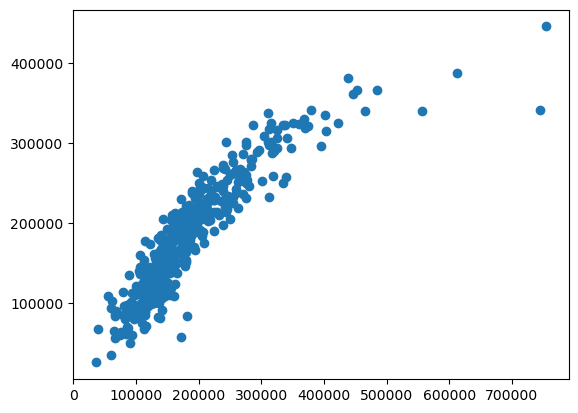

In [38]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred_rl)

plt.show()

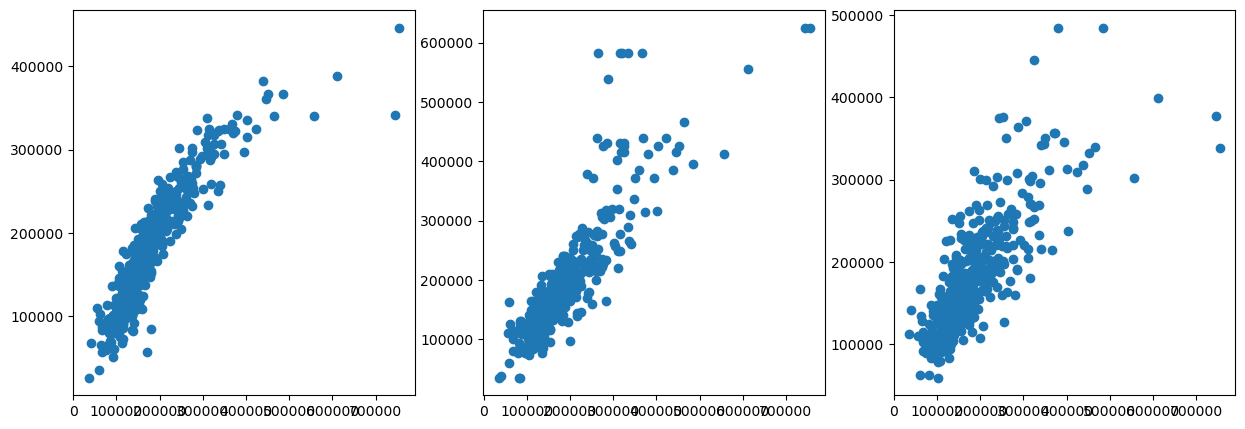

In [43]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test, y_pred_rl)
ax[1].scatter(y_test, y_pred_ad)
ax[2].scatter(y_test, y_pred_knn)
plt.show()

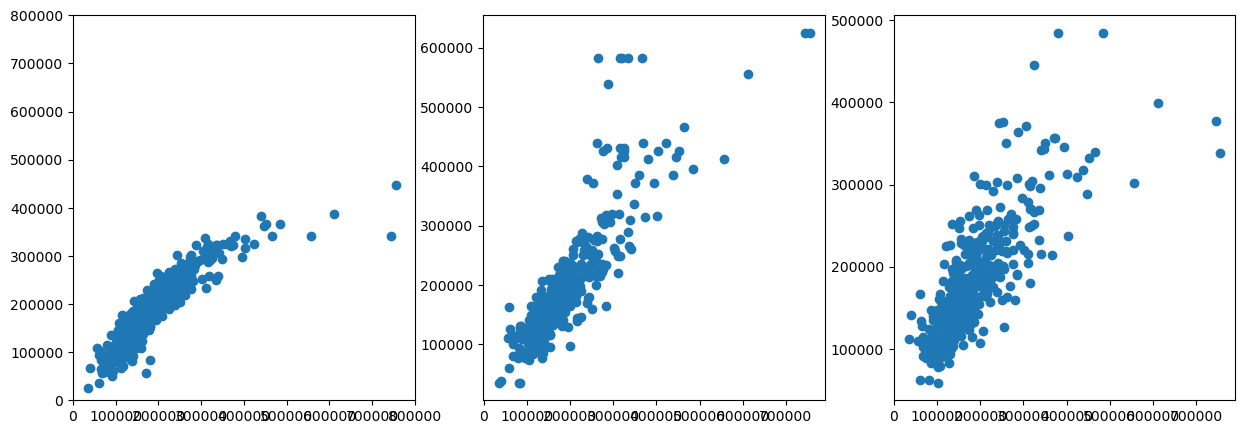

In [45]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test, y_pred_rl)
ax[1].scatter(y_test, y_pred_ad)
ax[2].scatter(y_test, y_pred_knn)

ax[0].set(xlim=(0, 800000), ylim=(0, 800000))
plt.show()

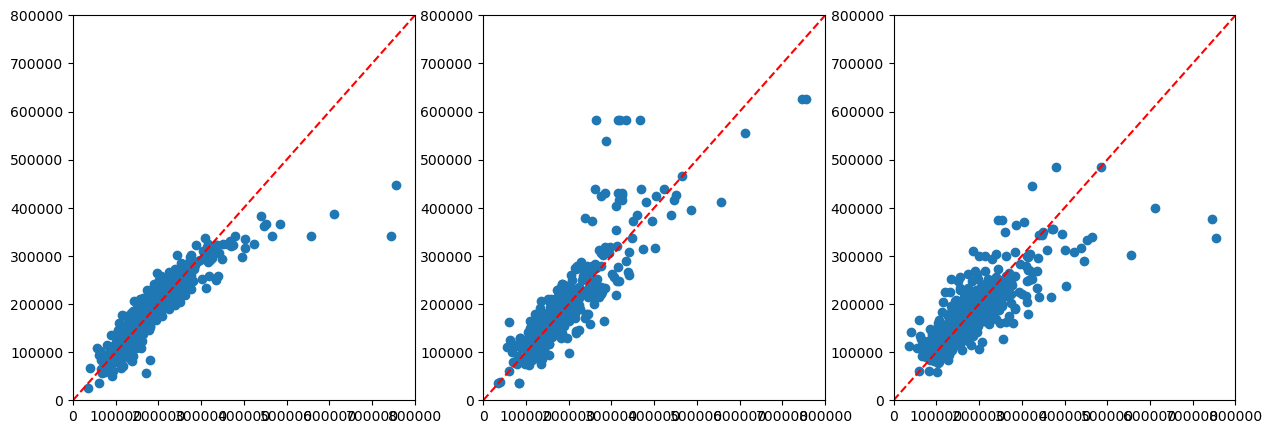

In [49]:
# tracando reata para conseguir comparar para saber o qunato estamos acertando na previsao

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test, y_pred_rl)
ax[0].plot([0, 800000], [0,800000], '--r')
ax[1].scatter(y_test, y_pred_ad)
ax[1].plot([0, 800000], [0,800000], '--r')
ax[2].scatter(y_test, y_pred_knn)
ax[2].plot([0, 800000], [0,800000], '--r')

ax[0].set(xlim=(0, 800000), ylim=(0, 800000))
ax[1].set(xlim=(0, 800000), ylim=(0, 800000))
ax[2].set(xlim=(0, 800000), ylim=(0, 800000))
plt.show()

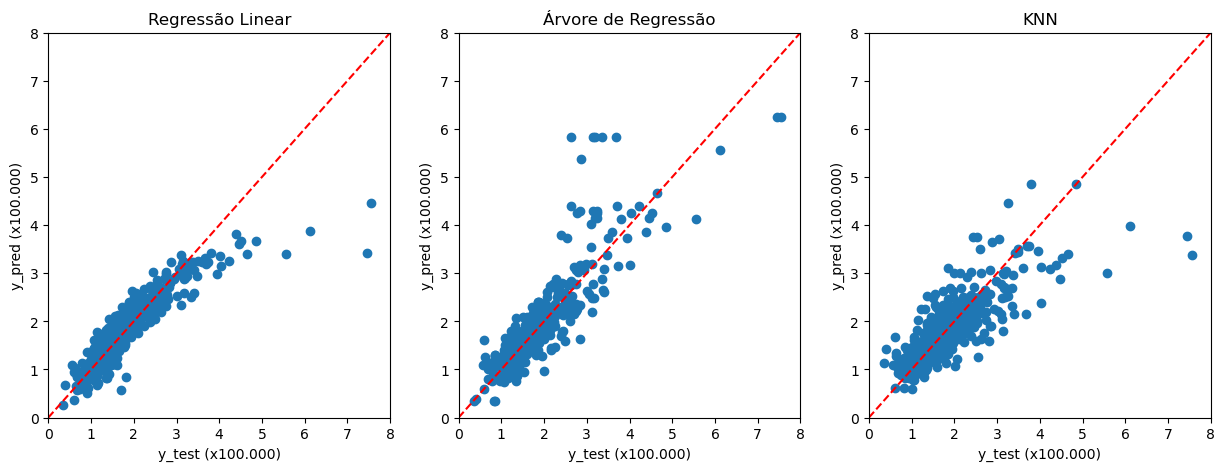

In [50]:
# deixando ainda mais visual

fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

#finalizamos a primeira parte
agora vamos importar a base de testes do Kaggle usando o arquivo Test

In [60]:
teste = pd.read_csv('test.csv')
teste.head(3)

# nao temos uma coluna sales price que e a coluna que queremos prever
#precisamos fazer os mesmos tratementos que fizemos na primeira parte de treino, aqui em teste  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [61]:
# eliminando as mesmas colunas da base de treino

teste = teste.drop(eliminar,axis=1)


In [62]:
# verificando so colunas numericas

teste.columns[teste.dtypes != 'object']

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [64]:
teste = teste.loc[:,teste.columns[teste.dtypes != 'object']]  # guardando todas as colunas numericas em teste

In [65]:
col_nr_test = teste.columns[teste.dtypes != 'object']
col_nr_test  # guardando em uma varivel

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [67]:
teste = teste.loc[:,col_nr_test]

In [68]:
teste.head(3)  # apenas valores numericos agora

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [70]:
# veirifcando valores vazios

teste.isnull().sum().sort_values(ascending=False)

#nao podemos tirar colunas pois queremos fazer previsao de todas as linhas 

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
Fireplaces        0
FullBath          0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
MSSubClass        0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
LotArea           0
YrSold            0
dtype: int64

In [ ]:
# vamos alterar todos os valores vazios por -1

In [73]:
teste = teste.fillna(-1)

In [74]:
teste.isnull().sum().sort_values(ascending=False) # todos 0 agora..

# nao estamos fazendo nenhum tratamento entao a coluna ID=0 nao vamos eliminar ainda

Id               0
MSSubClass       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFinSF1       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [75]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [76]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [77]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview , no Submission File Format Kaggle ele pede para
# enviar o formato de arquivo assim:
#Id,SalePrice
#1461,169000.1
#1462,187724.1233
#1463,175221
etc.

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [78]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado1.csv',index=False) # index = a falso pois nao qieremos criar a colunas de indice

#FOI ENVIADO NO KAGGLE ESSE ARQUIVO COM PONTUACAO DE 0.25476.
# FIQUEI EM 3638 LUGAR 
# BASEADO NESSE ERRO VAMOS ATINGIR UMA NOVA NOTA PARA MELHORAR O NOSSO MODELO
# ESSE PRIMEIRO ARQUIVO SERA EMVOADO PARA O GITHUB